# Assignment 1
- Create a set of scatter charts by plotting each of the rows in Exhibit 1-3 against the development cost row. 
- For each one, explain why there is or is not any correlation. (For example, you would first plot “annual production volume” versus “development cost” and explain why there seems to be no correlation. 
- Then repeat for each of the remaining rows.) The data cover large ranges - make sure the charts are readable!

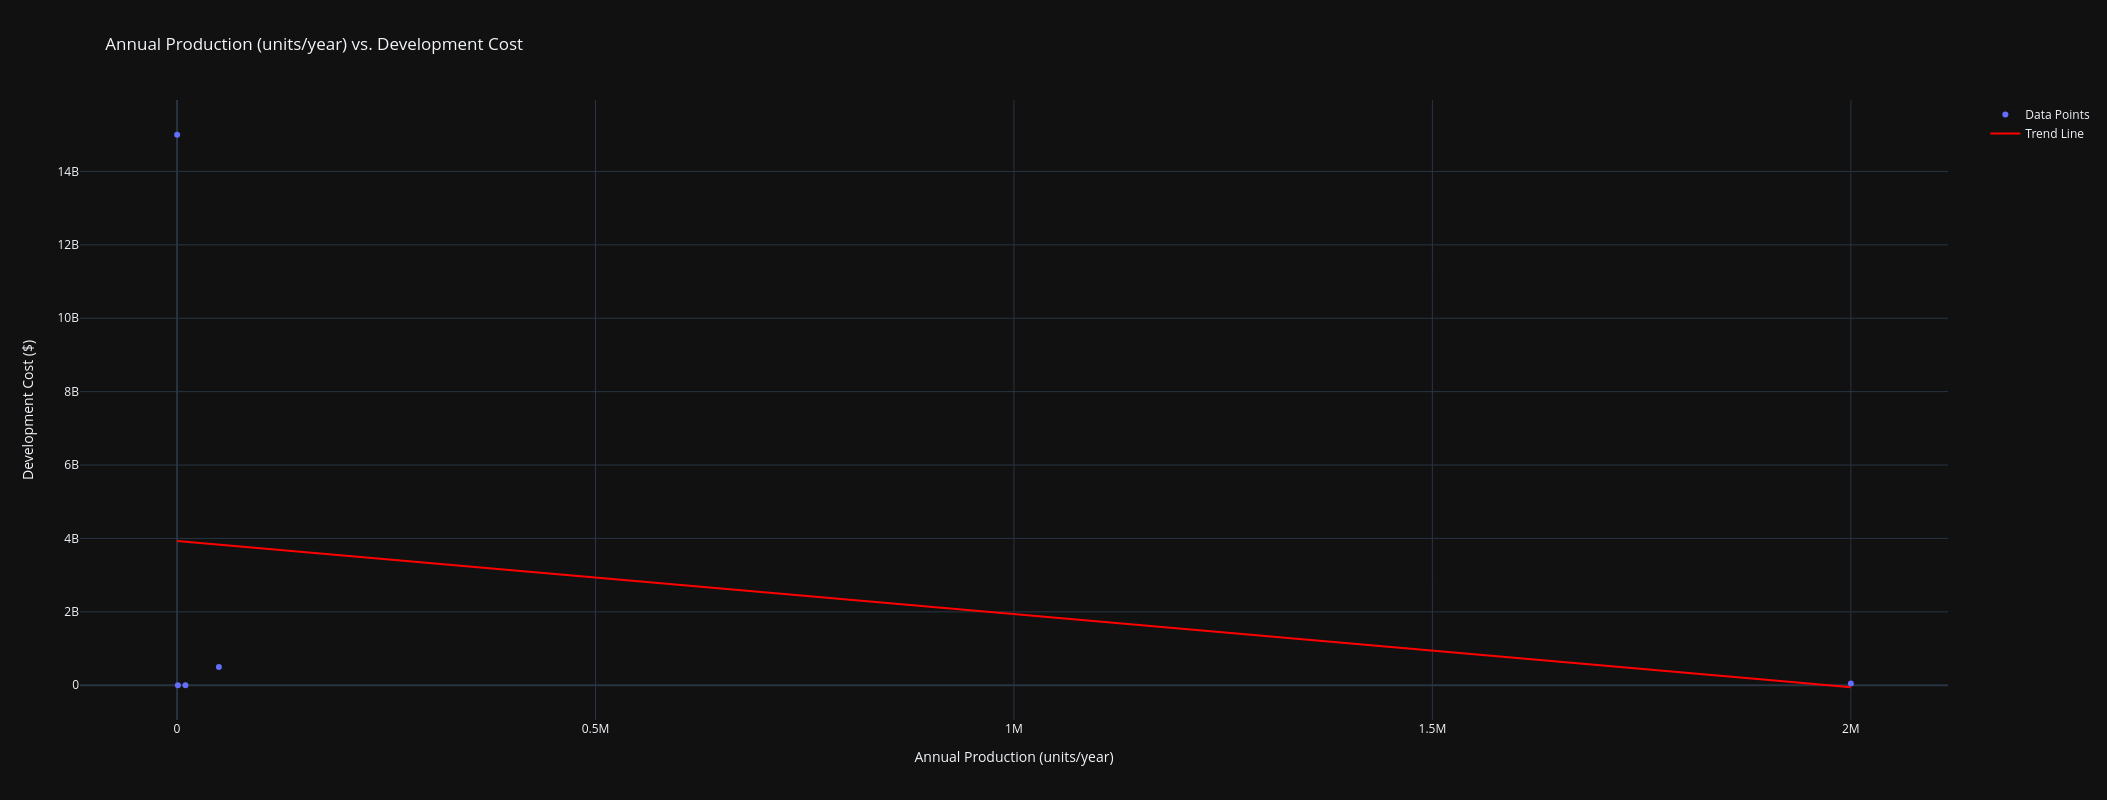

**Annual Production (units/year):**

There is no real correlation between annual production and development cost. The data is scattered, which makes sense because intuitively production volume does not guarantee high development cost.

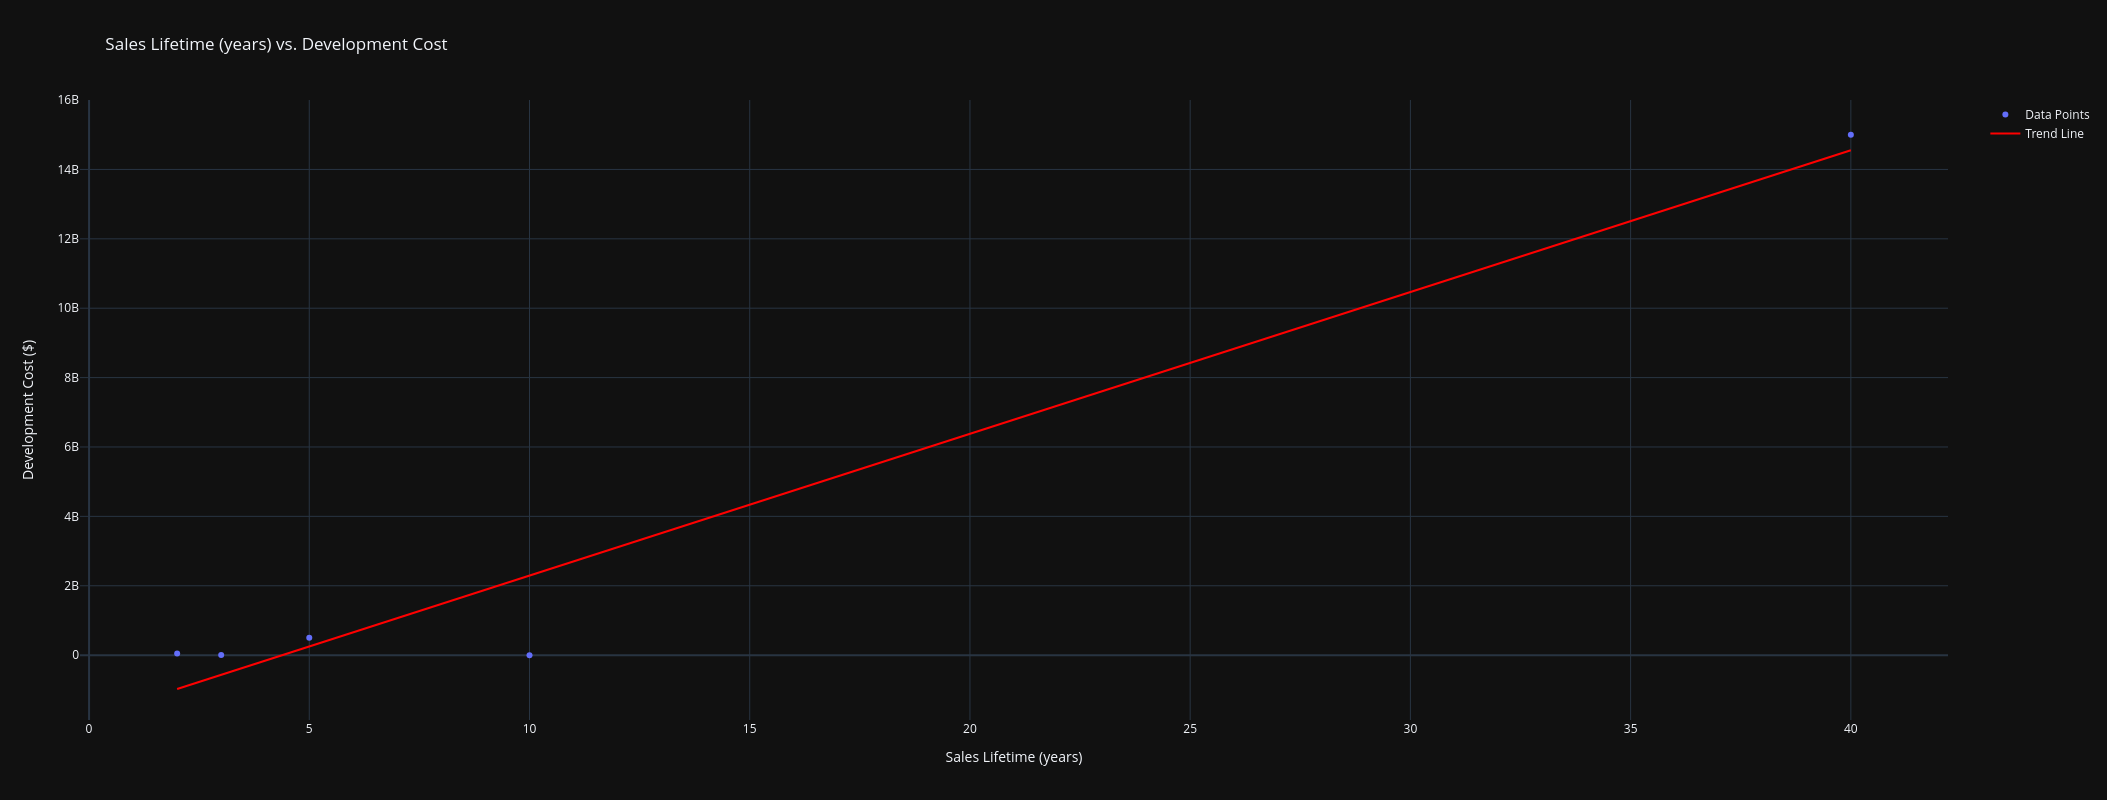

**Sales Lifetime (years):**

There is no real correlation between sales lifetime and development cost. The data is scattered, and this makes sense because a longer sales lifetime will not necessarily result in higher development costs.

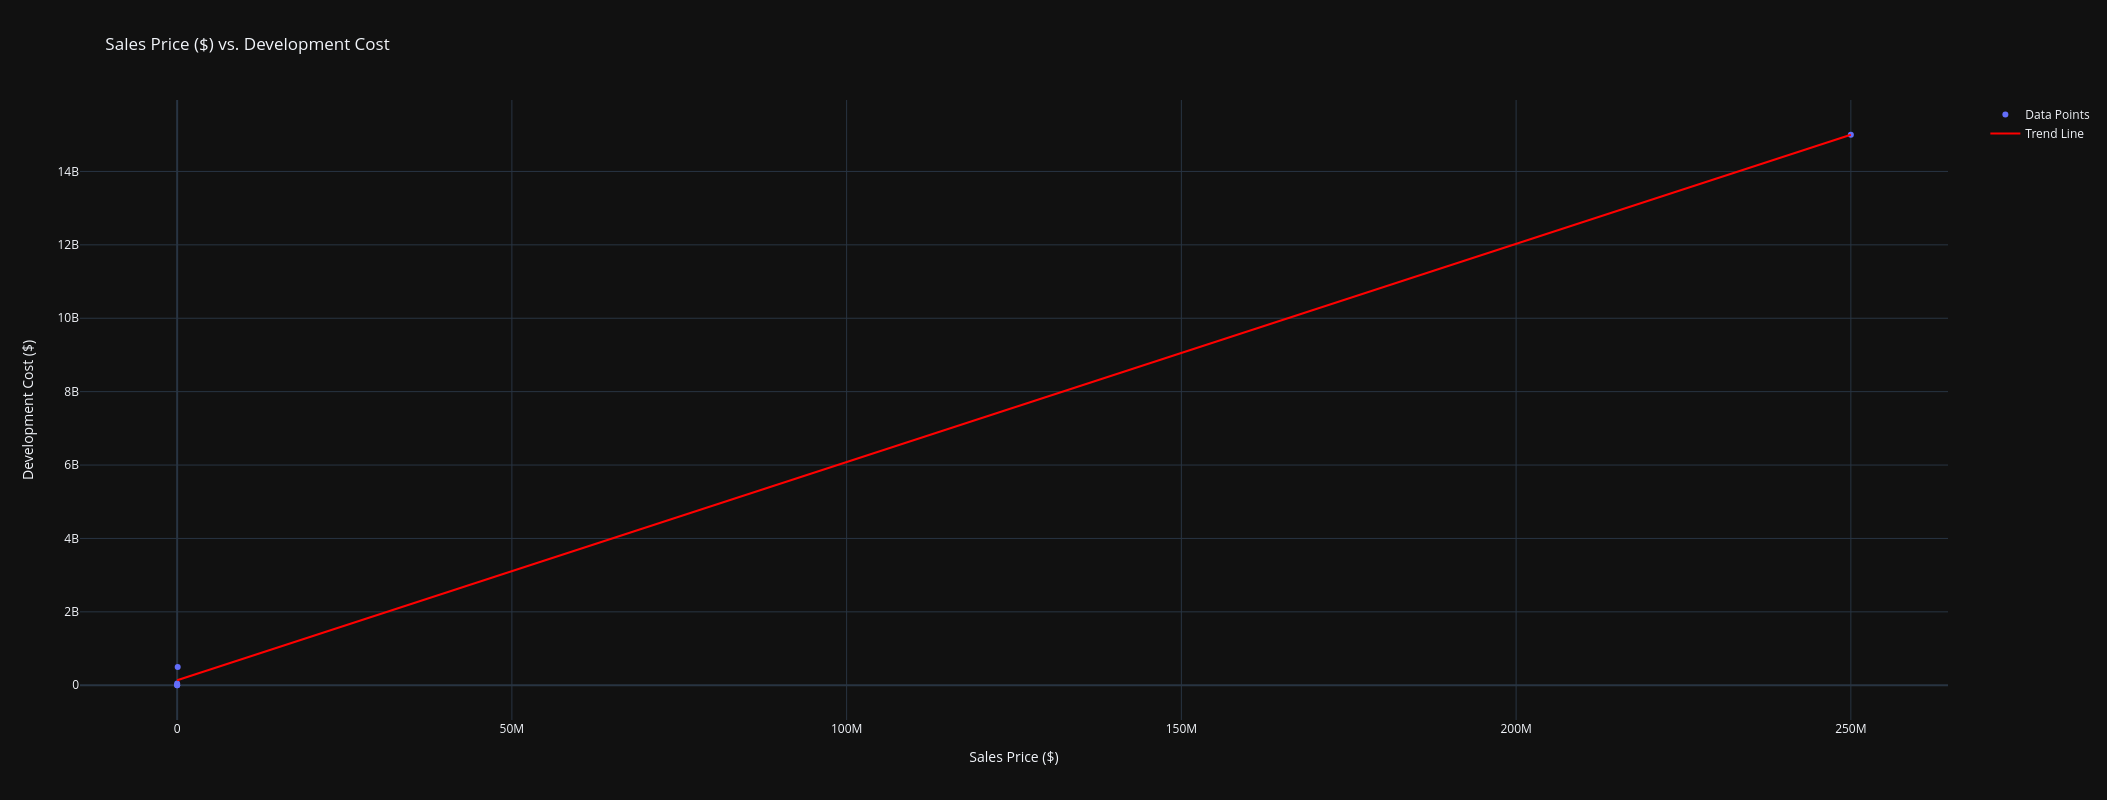

**Sales Price ($):**

The sample size limits the clarity of the correlation here between sales price and development cost; however, the trend line is linear, indicating that higher sales prices incur higher development costs.

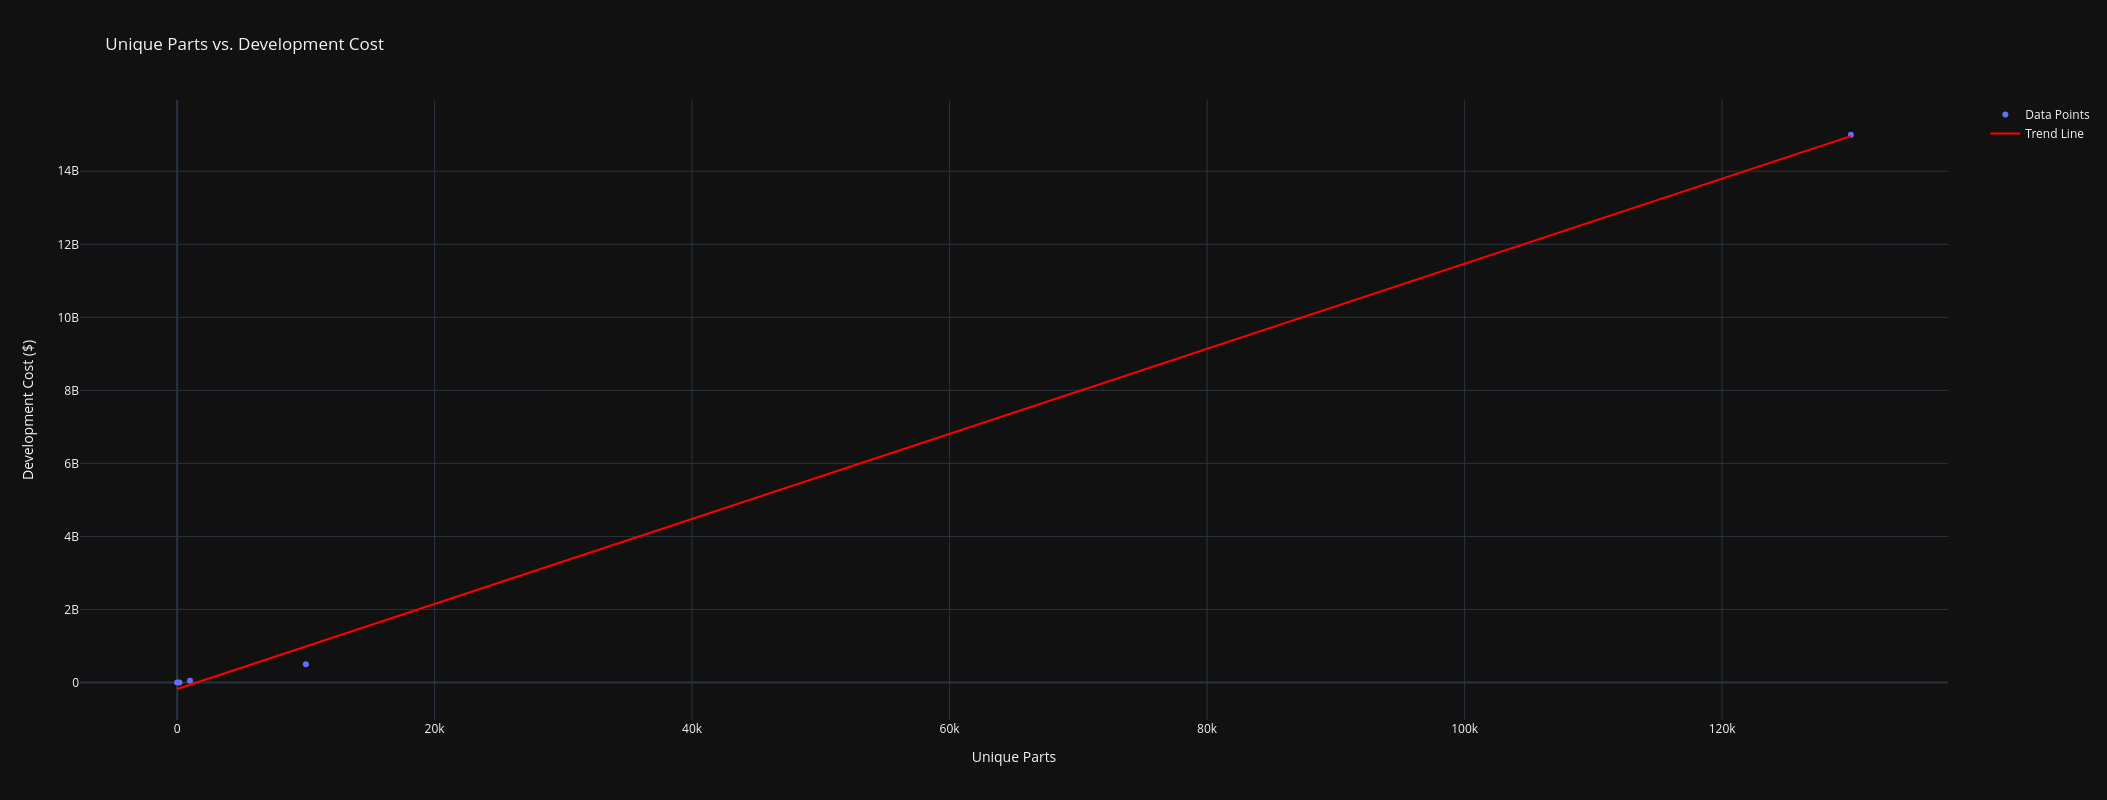

**Unique Parts:**

There appears to be a positive, linear correlation between the number of unique parts and development cost. This data suggests that development cost increases with the part count of the product, which makes sense as it requires resources to procure and/or develop the individual components.

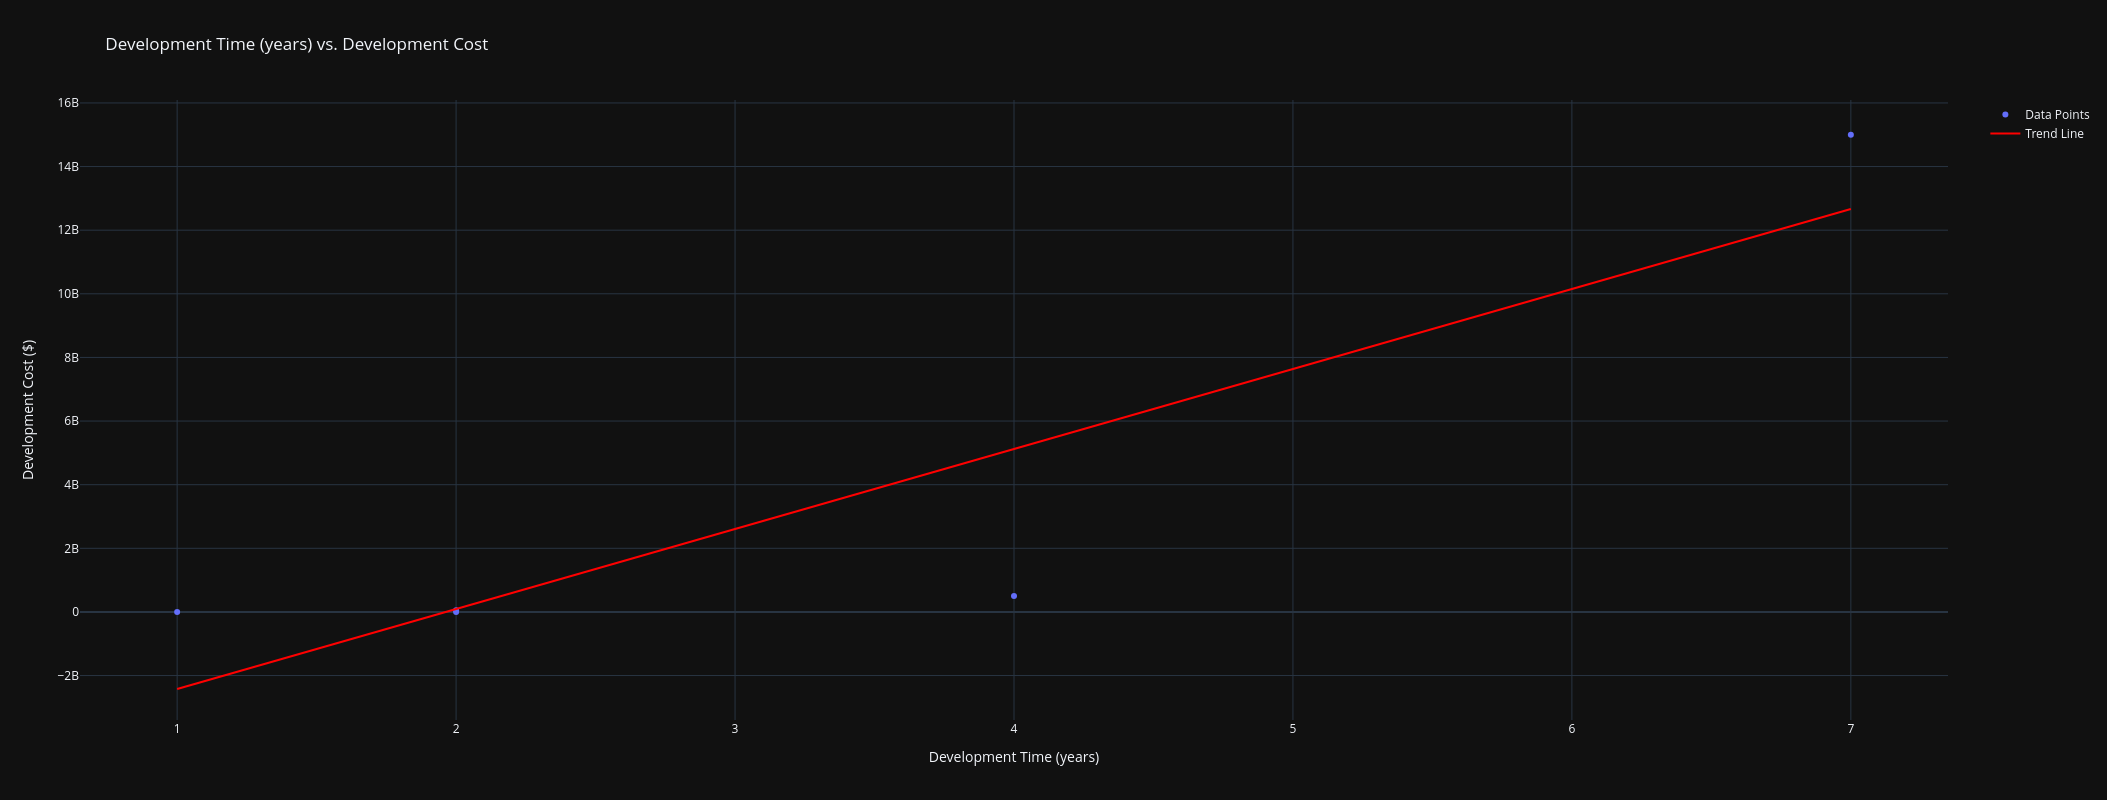

**Development Time (years):**

There seems to be a positive correlation between development time and development cost, although this is not necessarily linear across all projects. Longer development times are associated with higher development costs, which makes sense since more time often means more resources.

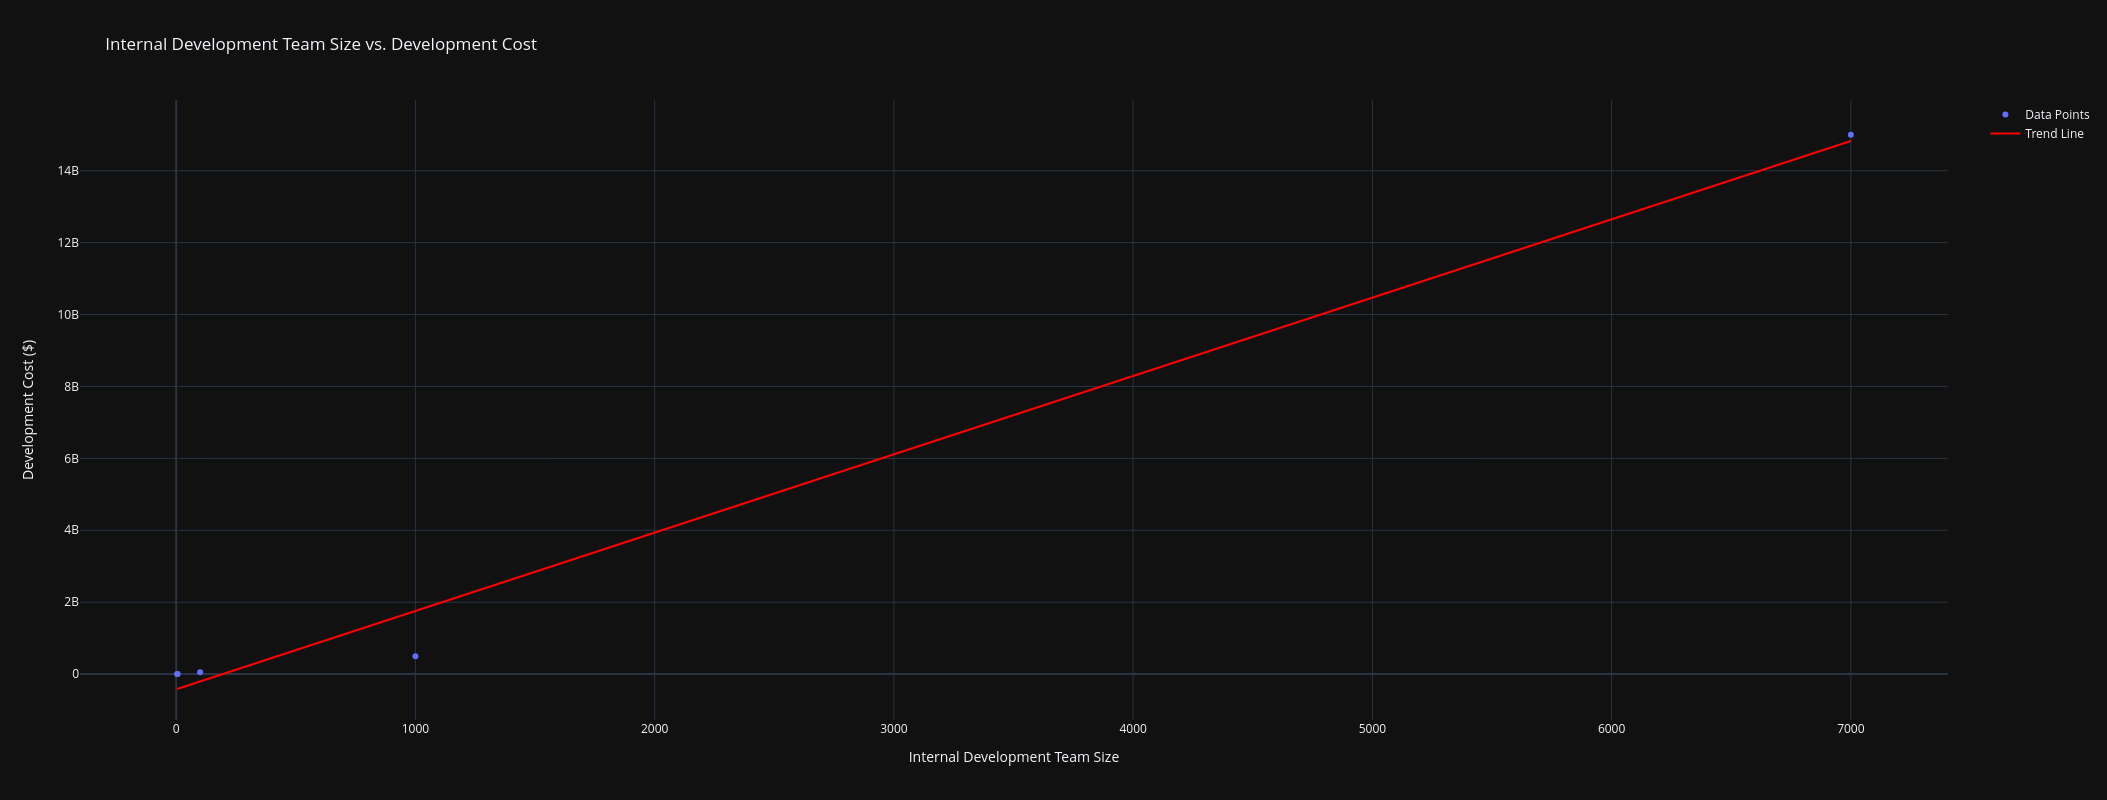

**Internal Development Team Size:**

There seems to be a positive correlation between the size of the internal development team and development cost. Larger teams tend to require more resources, which often leads to higher development costs.

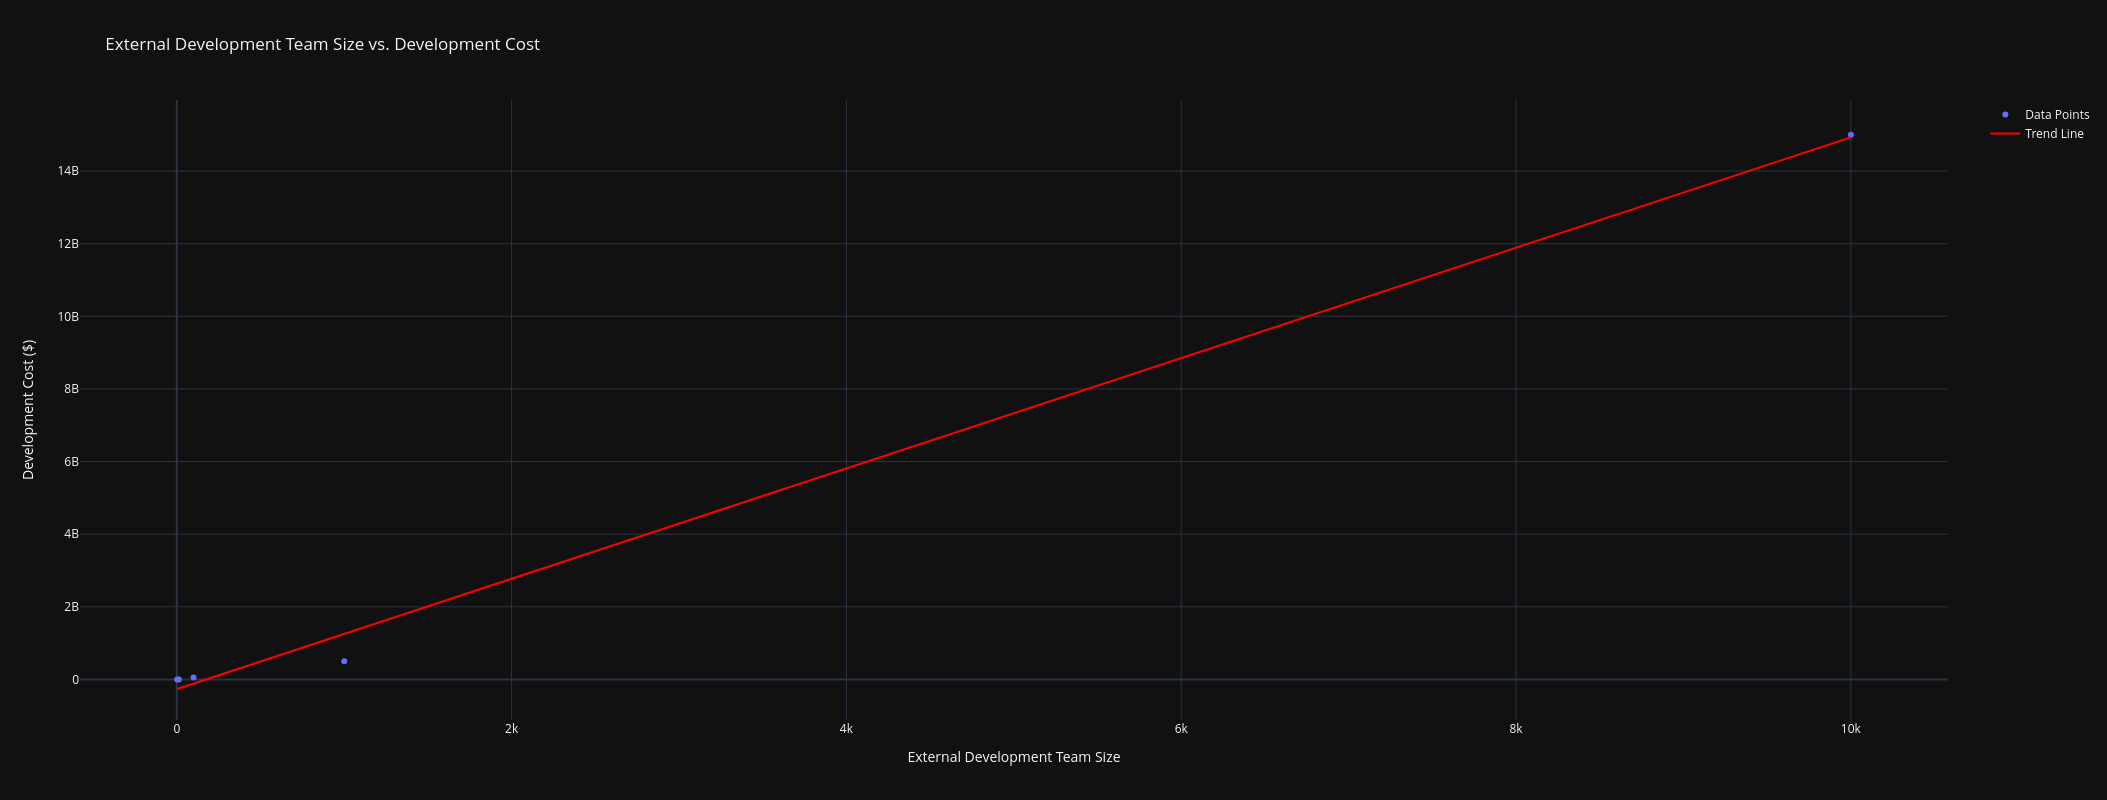

**External Development Team Size:**

Similar to the internal team size, there is a positive, roughly linear correlation between the size of the external development team and development cost. Larger external teams also contribute to higher development costs.

In [6]:
import pandas as pd
from IPython.display import Markdown

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

pio.templates.default = "plotly_dark"

data = {
    "Product": ["Belle-V Ice Cream", "AvaTech Avalanche", "iRobot Roomba", "Tesla Model S", "Boeing 787"],
    "Annual Production (units/year)": [10000, 1000, 2000000, 50000, 120],
    "Sales Lifetime (years)": [10, 3, 2, 5, 40],
    "Sales Price ($)": [40, 2250, 500, 80000, 250000000],
    "Unique Parts": [2, 175, 1000, 10000, 130000],
    "Development Time (years)": [1, 2, 2, 4, 7],
    "Internal Development Team Size": [4, 6, 100, 1000, 7000],
    "External Development Team Size": [2, 12, 100, 1000, 10000],
    "Development Cost ($)": [100000, 1000000, 50000000, 500000000, 15000000000],
    "Production Cost ($)": [20000, 250000, 10000000, 500000000, 15000000000]
}

df = pd.DataFrame(data)
development_cost = df["Development Cost ($)"]

explanations = {
    "Annual Production (units/year)": "There is no real correlation between annual production and development cost. The data is scattered, which makes sense because intuitively production volume does not guarantee high development cost.",
    "Sales Lifetime (years)": "There is no real correlation between sales lifetime and development cost. The data is scattered, and this makes sense because a longer sales lifetime will not necessarily result in higher development costs.",
    "Sales Price ($)": "The sample size limits the clarity of the correlation here between sales price and development cost; however, the trend line is linear, indicating that higher sales prices incur higher development costs.",
    "Unique Parts": "There appears to be a positive, linear correlation between the number of unique parts and development cost. This data suggests that development cost increases with the part count of the product, which makes sense as it requires resources to procure and/or develop the individual components.",
    "Development Time (years)": "There seems to be a positive correlation between development time and development cost, although this is not necessarily linear across all projects. Longer development times are associated with higher development costs, which makes sense since more time often means more resources.",
    "Internal Development Team Size": "There seems to be a positive correlation between the size of the internal development team and development cost. Larger teams tend to require more resources, which often leads to higher development costs.",
    "External Development Team Size": "Similar to the internal team size, there is a positive, roughly linear correlation between the size of the external development team and development cost. Larger external teams also contribute to higher development costs."
}

for col in df.columns[1:-2]:
    try:
        fig = go.Figure()

        fig.add_trace(go.Scatter(x=df[col], y=development_cost, mode='markers', name='Data Points'))

        z = np.polyfit(df[col], development_cost, 1)
        p = np.poly1d(z)
        trendline_x = np.linspace(min(df[col]), max(df[col]), 100)
        trendline_y = p(trendline_x)
        fig.add_trace(go.Scatter(x=trendline_x, y=trendline_y, mode='lines', name='Trend Line', line=dict(color='red')))

        fig.update_layout(
            title=f"{col} vs. Development Cost",
            xaxis_title=col,
            yaxis_title="Development Cost ($)",
            height=800,
            showlegend=True
        )
    except:
        print("")
    
    fig.show()
    
    print()
    display(Markdown(f"**{col}:**"))
    display(Markdown(f"{explanations[col]}"))
    print("\n")

